# Representing measurement in polar form to create quantum art

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from qiskit.circuit.random import random_circuit
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram

## r = cos(4*theta)

In [ ]:
num_qubit = 8

In [ ]:
x = 360/(2**num_qubit)
x

1.40625

In [ ]:
theta, r = [],[]
for i in range(2**num_qubit):
    angle = (i*x*np.pi)/180
    radius = np.cos(4*angle)
    if radius<0:
        r.append(abs(radius))
        theta.append(angle+np.pi)
    else:
        r.append(radius)
        theta.append(angle)

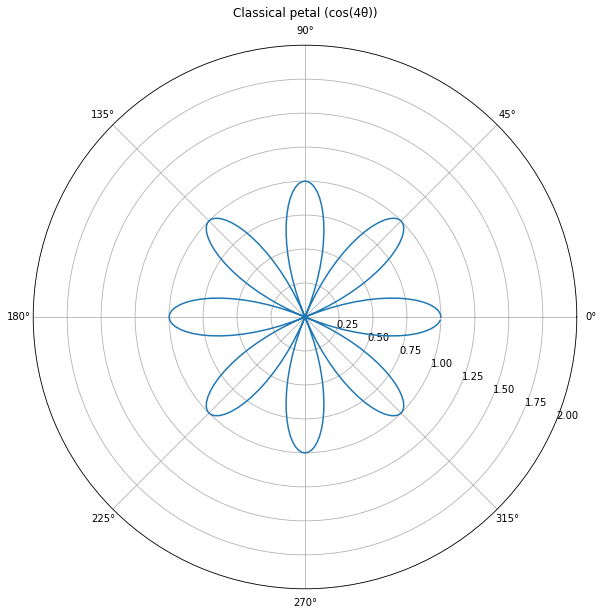

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))
ax.plot(theta, r)
# ax.scatter(theta, r)
ax.set_rmax(2)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
# ax.grid(False)

ax.set_title("Classical petal (cos(4θ))", va='bottom')
plt.show()

In [ ]:
# encode radius data into state by normalizing it
state = np.array(r)
state = state/np.linalg.norm(state)
state

array([8.83883476e-02, 8.79627336e-02, 8.66899903e-02, 8.45823751e-02,
       8.16601853e-02, 7.79515633e-02, 7.34922252e-02, 6.83251167e-02,
       6.25000000e-02, 5.60729741e-02, 4.91059349e-02, 4.16659787e-02,
       3.38247563e-02, 2.56577830e-02, 1.72437112e-02, 8.66357307e-03,
       5.41222535e-18, 8.66357307e-03, 1.72437112e-02, 2.56577830e-02,
       3.38247563e-02, 4.16659787e-02, 4.91059349e-02, 5.60729741e-02,
       6.25000000e-02, 6.83251167e-02, 7.34922252e-02, 7.79515633e-02,
       8.16601853e-02, 8.45823751e-02, 8.66899903e-02, 8.79627336e-02,
       8.83883476e-02, 8.79627336e-02, 8.66899903e-02, 8.45823751e-02,
       8.16601853e-02, 7.79515633e-02, 7.34922252e-02, 6.83251167e-02,
       6.25000000e-02, 5.60729741e-02, 4.91059349e-02, 4.16659787e-02,
       3.38247563e-02, 2.56577830e-02, 1.72437112e-02, 8.66357307e-03,
       1.62366761e-17, 8.66357307e-03, 1.72437112e-02, 2.56577830e-02,
       3.38247563e-02, 4.16659787e-02, 4.91059349e-02, 5.60729741e-02,
      

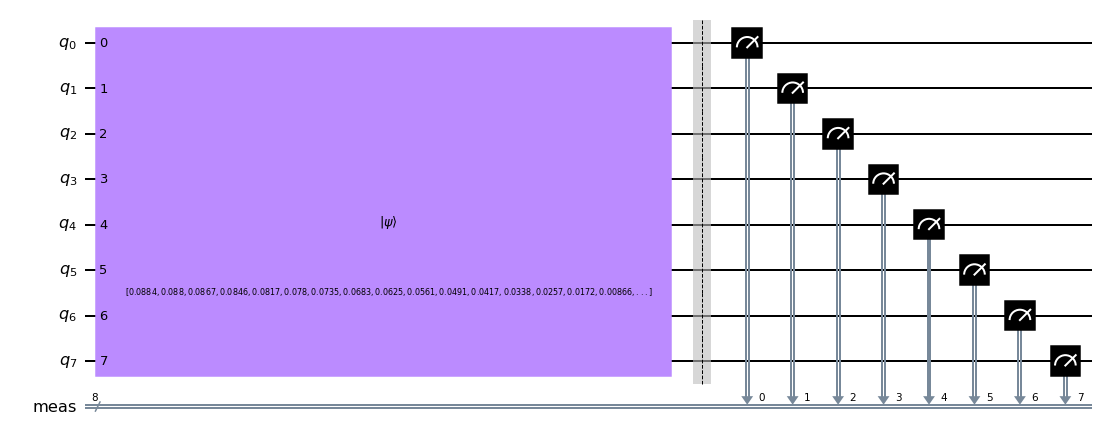

In [ ]:
qc = QuantumCircuit(num_qubit)
qc.initialize(state)
qc.measure_all()
qc.draw(output='mpl')

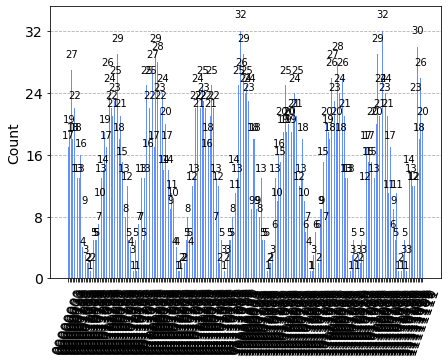

In [ ]:
shots = 3000
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc,backend,shots=shots).result().get_counts()
plot_histogram(counts)

In [ ]:
angle = 2*np.pi/(2**num_qubit)
print(angle)
r, theta = [],[]
for i in range(2**num_qubit):
    dict_key = bin(i)[2:]
    while len(dict_key)!=num_qubit:
        dict_key = '0'+dict_key
    theta.append(i*angle)
    if dict_key in counts:
        r.append(counts[dict_key]/shots)
    else:
        r.append(0)
max_r = max(r)
for i in range(len(r)):
    r[i] = (r[i]/max_r)

0.02454369260617026


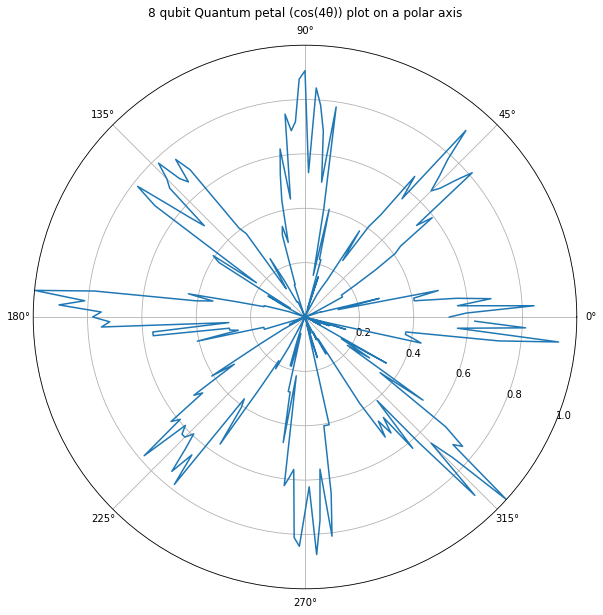

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))
ax.plot(theta, r)
# ax.scatter(theta, r)
ax.set_rmax(1)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
# ax.grid(False)

ax.set_title("8 qubit Quantum petal (cos(4θ)) plot on a polar axis", va='bottom')
plt.show()

# r = 1-sin(theta)

1.40625


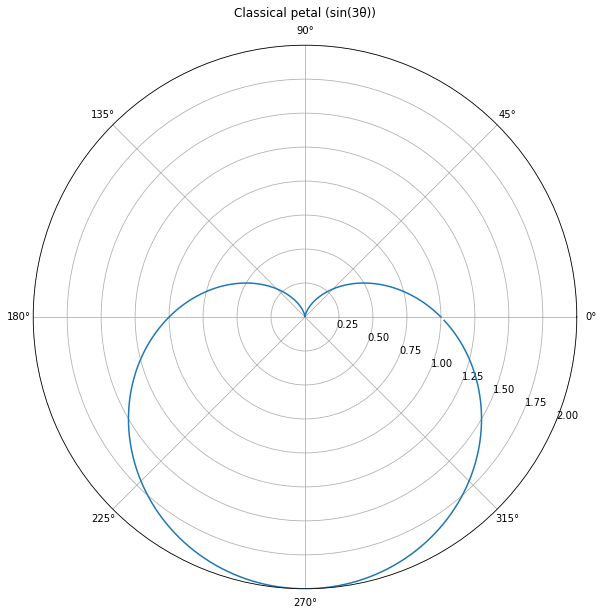

In [ ]:
num_qubit = 8

x = 360/(2**num_qubit)
print(x)

theta, r = [],[]
for i in range(2**num_qubit):
    angle = (i*x*np.pi)/180
    radius = 1 - np.sin(angle)
    if radius<0:
        r.append(abs(radius))
        theta.append(angle+np.pi)
    else:
        r.append(radius)
        theta.append(angle)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))
ax.plot(theta, r)
# ax.scatter(theta, r)
ax.set_rmax(2)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
# ax.grid(False)

ax.set_title("Classical petal (sin(3θ))", va='bottom')
plt.show()



In [ ]:
# encode radius data into state by normalizing it
state = np.array(r)
state = state/np.linalg.norm(state)
state

array([5.10310363e-02, 4.97786720e-02, 4.85270620e-02, 4.72769604e-02,
       4.60291201e-02, 4.47842927e-02, 4.35432281e-02, 4.23066740e-02,
       4.10753750e-02, 3.98500730e-02, 3.86315059e-02, 3.74204079e-02,
       3.62175084e-02, 3.50235320e-02, 3.38391980e-02, 3.26652196e-02,
       3.15023042e-02, 3.03511521e-02, 2.92124568e-02, 2.80869042e-02,
       2.69751723e-02, 2.58779308e-02, 2.47958405e-02, 2.37295533e-02,
       2.26797116e-02, 2.16469476e-02, 2.06318835e-02, 1.96351307e-02,
       1.86572896e-02, 1.76989492e-02, 1.67606869e-02, 1.58430677e-02,
       1.49466445e-02, 1.40719571e-02, 1.32195325e-02, 1.23898842e-02,
       1.15835118e-02, 1.08009011e-02, 1.00425236e-02, 9.30883602e-03,
       8.60028033e-03, 7.91728334e-03, 7.26025647e-03, 6.62959547e-03,
       6.02568025e-03, 5.44887456e-03, 4.89952587e-03, 4.37796507e-03,
       3.88450634e-03, 3.41944692e-03, 2.98306693e-03, 2.57562925e-03,
       2.19737929e-03, 1.84854490e-03, 1.52933621e-03, 1.23994548e-03,
      

In [ ]:
qc = QuantumCircuit(num_qubit)
qc.initialize(state)
qc.measure_all()
qc.draw(output='mpl')

shots = 3000
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc,backend,shots=shots).result().get_counts()
plot_histogram(counts)

angle = 2*np.pi/(2**num_qubit)
print(angle)
r, theta = [],[]
for i in range(2**num_qubit):
    dict_key = bin(i)[2:]
    while len(dict_key)!=num_qubit:
        dict_key = '0'+dict_key
    theta.append(i*angle)
    if dict_key in counts:
        r.append(counts[dict_key]/shots)
    else:
        r.append(0)
max_r = max(r)
for i in range(len(r)):
    r[i] = (r[i]/max_r)

0.02454369260617026


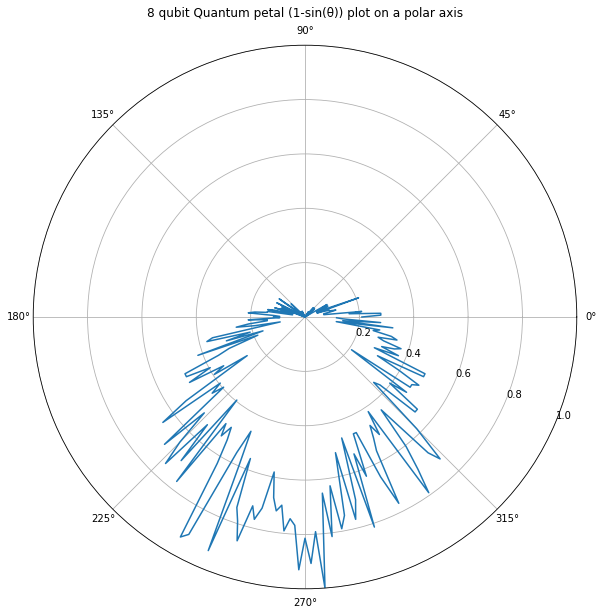

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))
ax.plot(theta, r)
# ax.scatter(theta, r)
ax.set_rmax(1)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
# ax.grid(False)

ax.set_title("8 qubit Quantum petal (1-sin(θ)) plot on a polar axis", va='bottom')
plt.show()